# test tic + peak local max


In [67]:
import numpy as np
import baseline_correction
import math
import h5py
import plot
from read_chroma import read_chromato_and_chromato_cube
import read_chroma
import skimage
import peak_detection
import projection

In [68]:
mode= "tic"

In [66]:
# choose the methode
# method = "peak_local_max"
method = "persistence_homology"
# method = 'DOG'
# method = 'LOG'
# method = 'DOH'

In [69]:
#file_path = '/home/camille/Documents/app/data/G0-1-160123.h5'
file_path = '/home/camille/Documents/app/data/P-L-007-801838-Tedlar.h5'
#file_path = '/home/camille/Documents/app/data/A-F-028-817822-droite-ReCIVA.h5'



In [70]:
def get_mod_time(file_path):
    """Get modulation time based on scan_number from CDF file."""
        #TODO recup  le .npy
    # print(f"Analyzing file: {file_path}")
    with h5py.File(file_path, 'r') as f:
        scan_number = f.attrs['scan_number_size']
        print(f"scan_number_size: {scan_number}")

    # data = nc.Dataset(file_path, 'r')
    # scan_number = data.dimensions['scan_number'].size
    if scan_number == 328125:   
        mod_time = 1.25
        print("type de donnees: G0/plasma")
    elif scan_number == 540035:
        mod_time = 1.7
        print("type de donnnees: air expire")
    else:
        print("scan_number non reconnu")
    # mod_time =1.7
    return mod_time

mod_time= get_mod_time(file_path)

scan_number_size: 540035
type de donnnees: air expire


In [62]:
tic_chromato, time_rn, spectra_obj = read_chroma.read_chroma(file_path, mod_time, None)

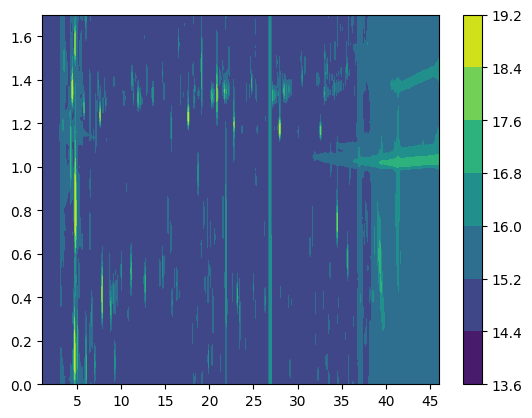

In [63]:
plot.visualizer((tic_chromato, time_rn), mod_time)

In [64]:
tic_chromato_preprocessed = baseline_correction.chromato_reduced_noise(tic_chromato)

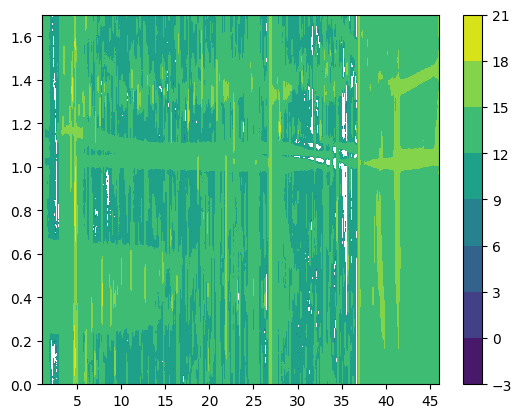

In [65]:
plot.visualizer((tic_chromato_preprocessed, time_rn), mod_time)

In [53]:
sigma = skimage.restoration.estimate_sigma(tic_chromato_preprocessed, channel_axis=None)
print(f"Estimated noise sigma: {sigma}")

Estimated noise sigma: 2672.792821211296


In [ ]:

abs_threshold = 0
rel_threshold = 0.01
noise_factor = 1.5
min_persistence = 0.02
min_distance = 1
sigma_ratio = 1.6
num_sigma = 10
min_sigma = 1
max_sigma = 30
overlap = 0.5
match_factor_min = 650
cluster = True
min_samples = 4
eps = 3

In [55]:
coordinates = peak_detection.peak_detection(
    (tic_chromato_preprocessed, time_rn, None),
    chromato_cube=None,
    sigma=sigma,
    noise_factor=noise_factor,
    abs_threshold=abs_threshold,
    rel_threshold=rel_threshold,
    method=method,
    mode=mode,
    cluster=cluster,
    min_distance=min_distance,
    min_sigma=min_sigma,
    max_sigma=max_sigma,
    sigma_ratio=sigma_ratio,
    num_sigma=num_sigma,
    min_persistence=min_persistence,
    overlap=overlap,
    eps=eps,
    min_samples=min_samples)

In [56]:
len(coordinates)

831

In [57]:
coordinates_in_chromato=projection.matrix_to_chromato(coordinates, time_rn, mod_time, tic_chromato_preprocessed.shape)


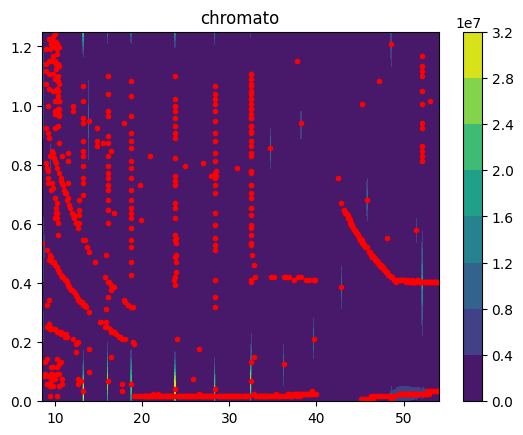

In [58]:
plot.visualizer((tic_chromato_preprocessed, time_rn), mod_time, title="chromato", log_chromato=False, points=coordinates_in_chromato)